Part b1. use pure pytorch tensor datastructure to build the same - do not use the auto differentiation yet. (check my pointers in the list of pytorch pointers)



# Import Libraries

In [2]:
pip install tsne

     |████████████████████████████████| 552kB 5.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tsne: filename=tsne-0.3.1-cp37-cp37m-linux_x86_64.whl size=260495 sha256=19e5e929df85b590fffd0936ffeadd888875e4249ce5c78ae5e1a4b43dd0567e
  Stored in directory: /root/.cache/pip/wheels/3e/d6/fc/58392f18ea8fc4c74e20185d2faeee87a1c1924a182606c6cd
Successfully built tsne


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
import torch
import torch.nn as nn

# Define Model

In [4]:
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu1 = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 50)
    self.relu2 = nn.ReLU()
    self.linear3 = nn.Linear(50, 2)
    # self.relu3 = nn.ReLU()

  def forward(self, input):
    l1 = self.linear1(input)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

# Define model fit method

In [5]:
def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

# Plot the model

In [6]:
#Plot using TSNE
from tsne import bh_sne
def tsne_plot(x_tensor, y_true_tensor):
  vis_data = bh_sne(x_tensor)
  # plot the result
  vis_x = vis_data[:, 0]
  vis_y = vis_data[:, 1]
  plt.scatter(vis_x, vis_y, c=y_true_tensor, cmap=plt.cm.get_cmap("jet", 10))
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  plt.show()

# Call the train model

In [7]:
d = 3
n = 200
inputs = np.random.uniform(-1, 1, (n,d))
weights_true = np.array([[2 , -1, 1], [1, -1, 1]]).T
bias_true = np.array([10])
y_true = (inputs**3) @ weights_true + (inputs**2) @ weights_true + inputs @ weights_true + bias_true
loss = nn.MSELoss()
model = TorchModel(d, 20)
#without auto differential
x_tensor = torch.tensor(inputs).float()
y_true_tensor = torch.tensor(y_true).float()

In [8]:
torch_fit(x_tensor, y_true_tensor, model, loss, lr=0.1, num_epochs=88)

tensor(116.5696, grad_fn=<MseLossBackward>)
tensor(71.1282, grad_fn=<MseLossBackward>)
tensor(36.3082, grad_fn=<MseLossBackward>)
tensor(88.8555, grad_fn=<MseLossBackward>)
tensor(68.8472, grad_fn=<MseLossBackward>)
tensor(48.4561, grad_fn=<MseLossBackward>)
tensor(19.2725, grad_fn=<MseLossBackward>)
tensor(3.7277, grad_fn=<MseLossBackward>)
tensor(3.5453, grad_fn=<MseLossBackward>)
tensor(3.2352, grad_fn=<MseLossBackward>)
tensor(2.9528, grad_fn=<MseLossBackward>)
tensor(2.6556, grad_fn=<MseLossBackward>)
tensor(2.5823, grad_fn=<MseLossBackward>)
tensor(2.7109, grad_fn=<MseLossBackward>)
tensor(4.3701, grad_fn=<MseLossBackward>)
tensor(5.2067, grad_fn=<MseLossBackward>)
tensor(13.0270, grad_fn=<MseLossBackward>)
tensor(3.4565, grad_fn=<MseLossBackward>)
tensor(5.0015, grad_fn=<MseLossBackward>)
tensor(4.2938, grad_fn=<MseLossBackward>)
tensor(9.0436, grad_fn=<MseLossBackward>)
tensor(4.0375, grad_fn=<MseLossBackward>)
tensor(7.4786, grad_fn=<MseLossBackward>)
tensor(4.0468, grad_fn=<M

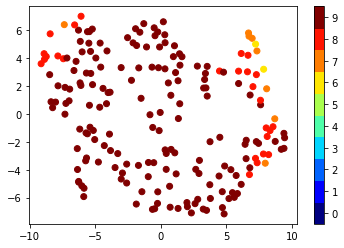

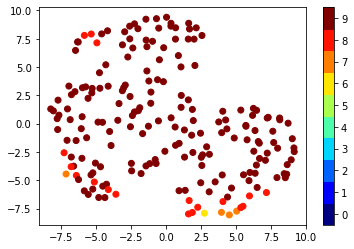

In [9]:
tsne_plot(inputs, y_true[:,0])
tsne_plot(inputs, y_true[:,1])